# SI Plots
* Code to load in CYGNUS limit data for spin-independent WIMP-proton cross section
* Also loads in neutrino floor for xenon and fluorine
* Also loads in current limits (2018) on the cross section

## First choose which experiment to plot:

In [45]:
expt = "CYGNUS1000"
#expt = "CYGNUS100k"

## Then load in data:

In [49]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
froot = "../data/"+expt+"-"
ftit = r"{\bf "+expt+r"} $\times$ 6 years"
fname = ["" for x in range(0,10)]
fname[0] ="Ideal"
fname[1] ="Pixel"
fname[2] ="Predrift"
fname[3] ="Postdrift"
fname[4] ="Strip"
fname[5] ="Optical"
fname[6] ="Wire"
fname[7] ="Pad"
fname[8] ="Planar"
fname[9] ="Nondirectional"

data_all = zeros(shape=(10,200))
data_all_SD = zeros(shape=(10,200))
m_all = zeros(shape=(10,200))
for i in range(0,10):
    data = loadtxt(froot+fname[i]+".txt")
    m,F,He = data[0,:], data[1,:], data[2,:]
    He[He==0] = 1
    F[F==0] = 1 # set all zeros to large number so minimum() can find interpolate between He and F
    m_all[i,:] = m
    data_all[i,:] = minimum(He,F)  
    data_all_SD[i,:] = F


## Then plot

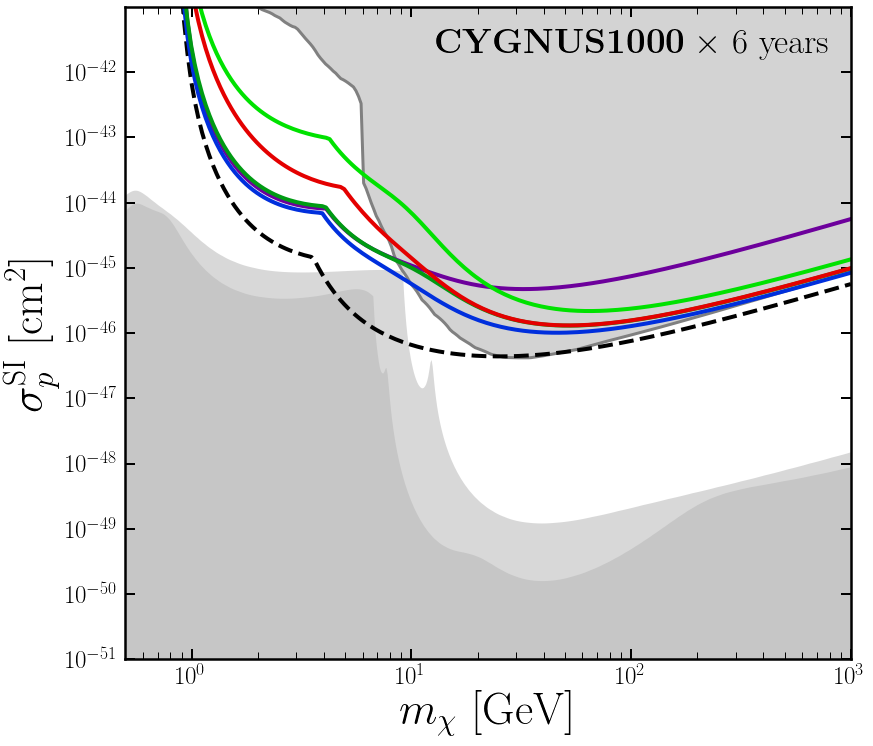

In [50]:
# 2018 Current limits
data = loadtxt("../data/SIlimits_2018.txt",delimiter=',')
mlim,slim = data[0,:],data[1,:]

# Xe and F neutrino floors
data = loadtxt("../data/nufloor_Xe.txt",delimiter=',')
m2,nu_Xe = data[0,:],data[1,:]
data = loadtxt("../data/nufloor_F.txt",delimiter=',')
m3,nu_F = data[0,:],data[1,:]

# Plot
plt.rcParams['axes.linewidth'] = 2.5
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
col = cm.nipy_spectral(linspace(0,1,10))
col[0,:] = [0,0,0,1]
col[-1,:] = [0,0,0,1]
# Close-up range
xmin = 0.5
xmax = 1.0e3
ymax = 1.0e-41
ymin = 1.0e-51

# Full range
#xmin = 0.1
#xmax = 1.0e3
#ymax = 1.0e-40
#ymin = 1.0e-50

# Neutrino floor
plt.fill_between(m2, nu_Xe, y2=ymin,facecolor='Gray',alpha= 0.2)
plt.fill_between(m2, nu_F, y2=ymin,facecolor='Gray',alpha=0.3)

# Expt limits
#plt.fill_between(mlim, slim, y2=ymax,facecolor=[0.0, 0.62, 0.38])
plt.fill_between(mlim, slim, y2=ymax,facecolor="lightGray")
plt.loglog(mlim, slim,"-",linewidth=3,color='Gray')

# Plot lines
lsty = ["-" for x in range(0,10)]
lsty[0] ="--"
lsty[-1] ="--"
for i in [0,1,2,4,5,8]:
    plt.loglog(m_all[i,:],data_all[i,:]/2,lsty[i],color=col[i,:],linewidth=4,label=r"{\bf "+fname[i]+"}")

# Labels
#plt.legend(loc='lower left',fontsize=35,frameon=False)
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=45)
plt.ylabel(r"$\sigma^{\rm SI}_p$ [cm$^2$]",fontsize=45)

# Limits
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)


# Style
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=25)
plt.yticks(10.0**arange(log10(ymin),log10(ymax),1),fontsize=25)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.text(13.0,2e-42,ftit,fontsize=35,color='k')
plt.show()
fig.savefig('../plots/'+expt+'-SI.pdf',bbox_inches='tight')


# SD Plots
* Code to load in CYGNUS limit data for spin-dedependent WIMP-proton cross section
* Also loads in neutrino floor for xenon and fluorine
* Also loads in current limits (2018) on the cross section

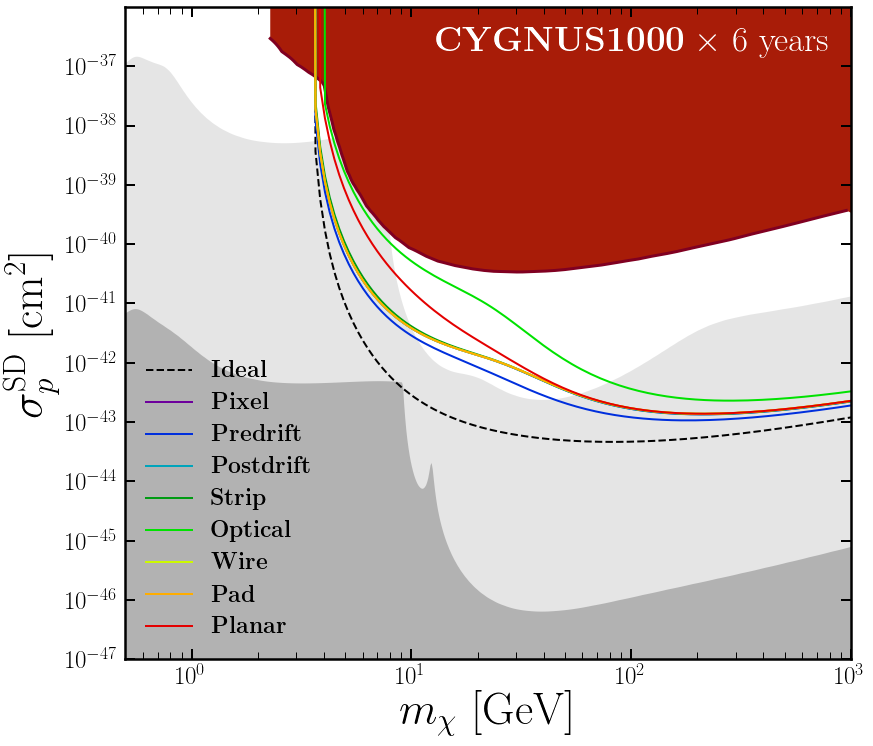

In [5]:
# Enhancement factors
A = 19
S_p = 0.478
J = 0.5
C_F = (4/3)*((J+1)/J)*(S_p)**2.0/A**2

A = 131
S_p = -0.038
J = 1.5
f = 0.2129+0.264
C_Xe = f*(4/3)*((J+1)/J)*(S_p)**2.0/A**2

# 2018 Current limits
data = loadtxt("../data/SDlimits_2018.txt",delimiter=',')
mlim,slim = data[0,:],data[1,:]

# Xe and F neutrino floors
data = loadtxt("../data/nufloor_Xe.txt",delimiter=',')
m2,nu_Xe = data[0,:],data[1,:]
data = loadtxt("../data/nufloor_F.txt",delimiter=',')
m3,nu_F = data[0,:],data[1,:]

# Plot
plt.rcParams['axes.linewidth'] = 2.5
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
col = cm.nipy_spectral(linspace(0,1,10))
col[0,:] = [0,0,0,1]
col[-1,:] = [0,0,0,1]
# Close-up range
xmin = 0.5
xmax = 1.0e3
ymax = 1.0e-36
ymin = 1.0e-47

# Full range
#xmin = 0.1
#xmax = 1.0e3
#ymax = 1.0e-40
#ymin = 1.0e-50

# Neutrino floor
plt.fill_between(m2, nu_Xe/C_Xe, y2=ymin,facecolor='Gray',alpha= 0.2)
plt.fill_between(m2, nu_F/C_F, y2=ymin,facecolor='Gray',alpha=0.5)

# Expt limits
plt.fill_between(append(mlim,2000.0), append(slim,1e-40), y2=ymax,facecolor=[0.66, 0.11, 0.03])
plt.loglog(mlim, slim,"-",linewidth=3,color=[0.5, 0.0, 0.13])

# Plot lines
lsty = ["-" for x in range(0,10)]
lsty[0] ="--"
lsty[-1] ="--"
for i in range(0,9):
    plt.loglog(m,data_all_SD[i,:]/C_F,lsty[i],color=col[i,:],linewidth=2,label=r"{\bf "+fname[i]+"}")

# Labels
plt.legend(loc='lower left',fontsize=23,frameon=False)
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=45)
plt.ylabel(r"$\sigma^{\rm SD}_p$ [cm$^2$]",fontsize=45)

# Limits
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)


# Style
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=25)
plt.yticks(10.0**arange(log10(ymin),log10(ymax),1),fontsize=25)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.text(13.0,1.8e-37,ftit,fontsize=35,color='w')
plt.show()
fig.savefig('../plots/'+expt+'-SD.pdf',bbox_inches='tight')

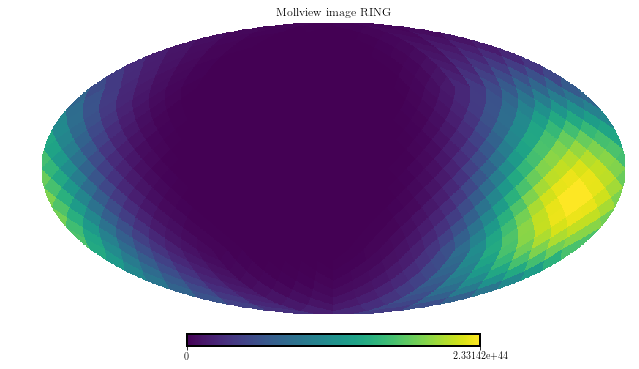

In [143]:
m_vals = logspace(10.0,100.0)
plt.loglog()


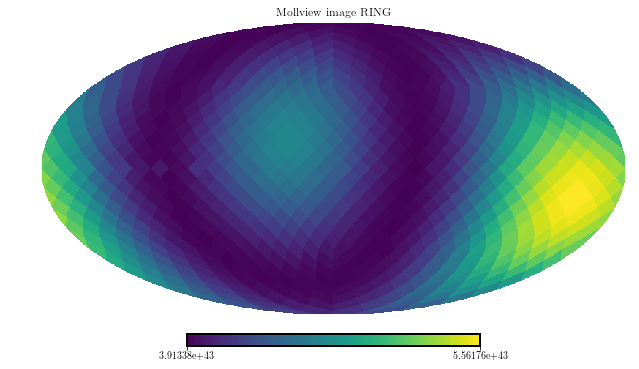

In [145]:
RD_wimp1 = loadtxt('../code/RD_wimp_1.dat')
RD_nu1 = loadtxt('../code/RD_nu_1.txt')
#hp.mollview(RD_nu1[:,1], title="Mollview image RING")
hp.mollview(RD_wimp1[:,0], title="Mollview image RING")
plt.show()

In [53]:
shape(RD_nu1)

(1536, 4)

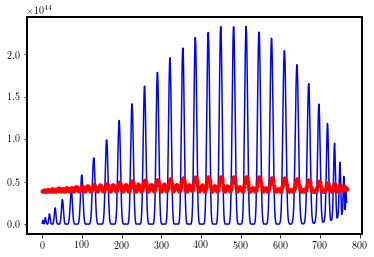

In [146]:
plt.plot(RD_wimp0[:,0],'b-')
plt.plot(RD_wimp1[:,0],'r.')
plt.show()

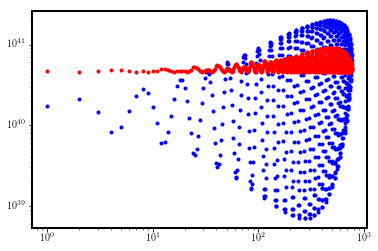

In [68]:
plt.semilogx(RD_wimp0,'b.')
plt.semilogy(RD_wimp1,'r.')
plt.show()

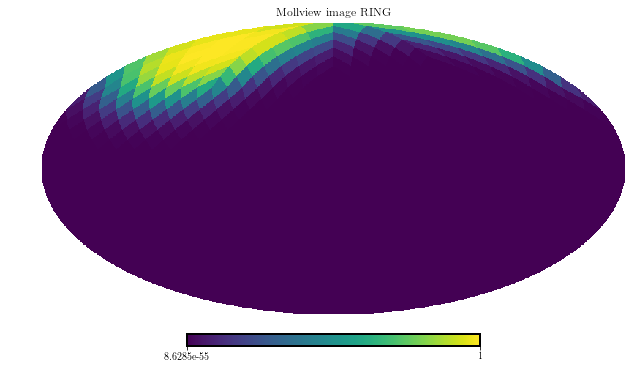

In [78]:
dat = loadtxt('../code/gauss.dat')
hp.mollview(dat[:,0], title="Mollview image RING")
plt.show()

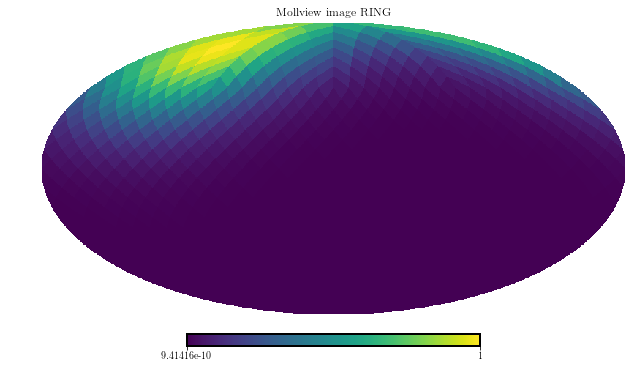

In [79]:
dat = loadtxt('../code/gauss.dat')
hp.mollview(dat[:,1], title="Mollview image RING")
plt.show()

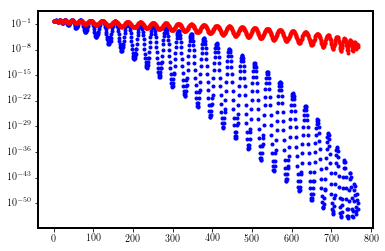

In [83]:
plt.semilogy(dat[:,0],'b.')
plt.semilogy(dat[:,1],'r.')
plt.show()

In [82]:
sigth = 30.0*pi/180.0
costhvals = linspace(-1,1,100)
thvals = acos(costhvals)
plt.plot(costhvals,exp(-thvals**2.0/(2*sigth**2.0)),'r-')
plt.show()

NameError: name 'acos' is not defined

In [114]:
lsty = ["" for x in range(0,10)]


In [117]:
lsty[0:10] = "-"


In [118]:
lsty

['-']

In [259]:
ftit

'{bfCYGNUS100k} $\times$ 6 years'

In [7]:
m

array([  5.00000000e-01,   5.25512705e-01,   5.52327207e-01,
         5.80509929e-01,   6.10130687e-01,   6.41262856e-01,
         6.73983556e-01,   7.08373844e-01,   7.44518910e-01,
         7.82508293e-01,   8.22436100e-01,   8.64401240e-01,
         9.08507668e-01,   9.54864644e-01,   1.00358700e+00,
         1.05479544e+00,   1.10861681e+00,   1.16518444e+00,
         1.22463846e+00,   1.28712614e+00,   1.35280228e+00,
         1.42182957e+00,   1.49437901e+00,   1.57063031e+00,
         1.65077236e+00,   1.73500370e+00,   1.82353298e+00,
         1.91657950e+00,   2.01437375e+00,   2.11715800e+00,
         2.22518686e+00,   2.33872793e+00,   2.45806248e+00,
         2.58348613e+00,   2.71530957e+00,   2.85385936e+00,
         2.99947870e+00,   3.15252833e+00,   3.31338739e+00,
         3.48245434e+00,   3.66014800e+00,   3.84690855e+00,
         4.04319864e+00,   4.24950451e+00,   4.46633723e+00,
         4.69423392e+00,   4.93375913e+00,   5.18550621e+00,
         5.45009880e+00,